Actual goal of this project:
1. Not to beat any research paper model
2. But to emphasize that neural network can do
better prediction than traditional models and
explain why??

Done:
1. Data Collection
2. Data Preprocessing
3. EDA
4. LSTM,GRU,RNN,CNN,Bi-LSTM
5. MA,EMA
6. ARIMA
7. Fbprophet
8. Time series analysis (Optional-Trend,Seasonality Decomp)
9. Comparing the rmse
10. Tuning best model
11. Forecast the values for next 30 days using the best model



In [ ]:
#To get arima and prophet forecasts
# !pip install pmdarima
# !pip install prophet

# Importing necessary libraries

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import SimpleRNN,Input,LSTM,GRU,Bidirectional,Concatenate
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Data Collection

In [ ]:
yf.pdr_override()
data = yf.download("TCS.NS")


[*********************100%%**********************]  1 of 1 completed


In [ ]:
# data.to_csv("TCS.csv")

In [ ]:
# data = pd.read_csv("TCS.csv")

In [ ]:
data.head(5)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-08-12,38.724998,40.000000,38.724998,39.700001,28.121284,212976
2002-08-13,39.750000,40.387501,38.875000,39.162498,27.740538,153576
2002-08-14,39.250000,39.250000,35.724998,36.462502,25.828024,822776
2002-08-15,36.462502,36.462502,36.462502,36.462502,25.828024,0
2002-08-16,36.275002,38.000000,35.750000,36.375000,25.766041,811856


In [ ]:
data.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-18,4215.250000,4254.750000,4117.850098,4152.500000,4152.500000,1526904
2024-03-19,4051.250000,4058.000000,3966.600098,3977.300049,3977.300049,8931209
2024-03-20,3986.000000,4018.000000,3960.199951,3970.899902,3970.899902,1817913
2024-03-21,3990.050049,4008.399902,3948.000000,3972.949951,3972.949951,3829582
2024-03-22,3897.000000,3938.000000,3855.000000,3910.899902,3910.899902,5852485


## Data Preprocessing

Data cleaning

In [ ]:
data.shape

(5365, 6)

In [ ]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

No missing values present in the data

### EDA

In [ ]:
# data = data.set_index("Date")

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5358.000000,5358.000000,5358.000000,5358.000000,5358.000000,5.358000e+03
mean,1183.006523,1195.169950,1170.017668,1182.522690,1065.555208,3.195536e+06
std,1134.309585,1144.065617,1123.876568,1134.017286,1106.857091,3.136458e+06
min,32.474998,36.450001,32.474998,35.474998,25.019131,0.000000e+00
25%,238.562500,243.246876,233.934380,238.330631,172.418873,1.642877e+06
50%,744.699982,751.625000,732.750000,746.062500,595.289978,2.499652e+06
75%,1900.750000,1915.137512,1873.674957,1894.112549,1699.018433,3.949176e+06
max,4153.000000,4184.750000,4105.549805,4149.500000,4149.500000,8.806715e+07


<Axes: xlabel='Date'>

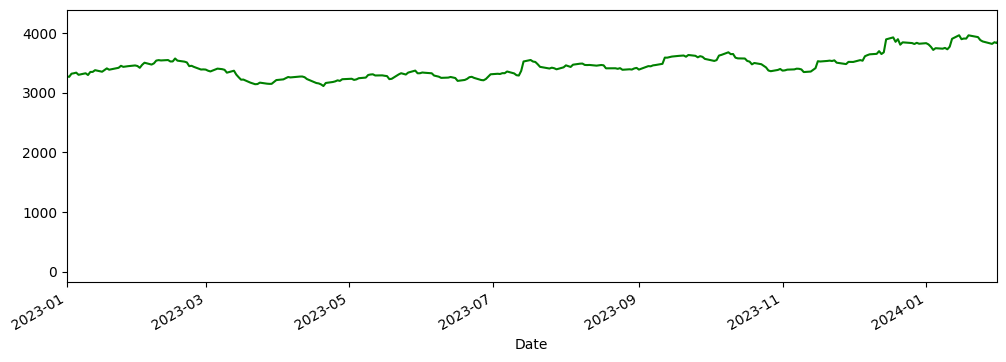

In [ ]:
data["High"].plot(xlim = ["2023-01-01","2024-01-31"] ,figsize = (12,4),c = "green")

In [ ]:
index = data.loc["2023-01-01":"2024-01-31"].index
share_open = data.loc["2023-01-01":"2024-01-31"]["Open"]


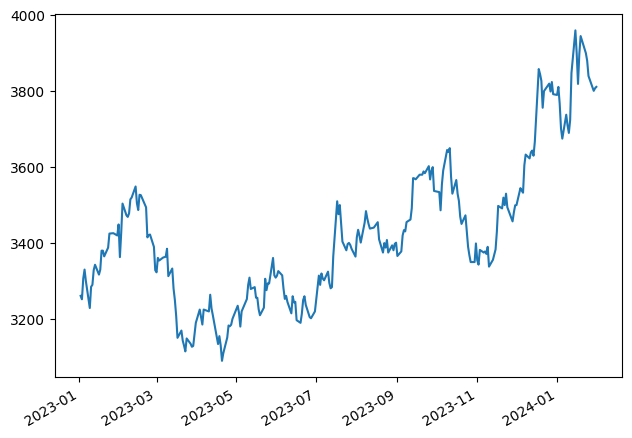

In [ ]:
fig,axs = plt.subplots()
plt.tight_layout()
fig.autofmt_xdate()
axs.plot(index,share_open)


In [ ]:
data.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5358 entries, 0 to 5357
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5358 non-null   datetime64[ns]
 1   Open       5358 non-null   float64       
 2   High       5358 non-null   float64       
 3   Low        5358 non-null   float64       
 4   Close      5358 non-null   float64       
 5   Adj Close  5358 non-null   float64       
 6   Volume     5358 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 293.1 KB


<Axes: xlabel='Date'>

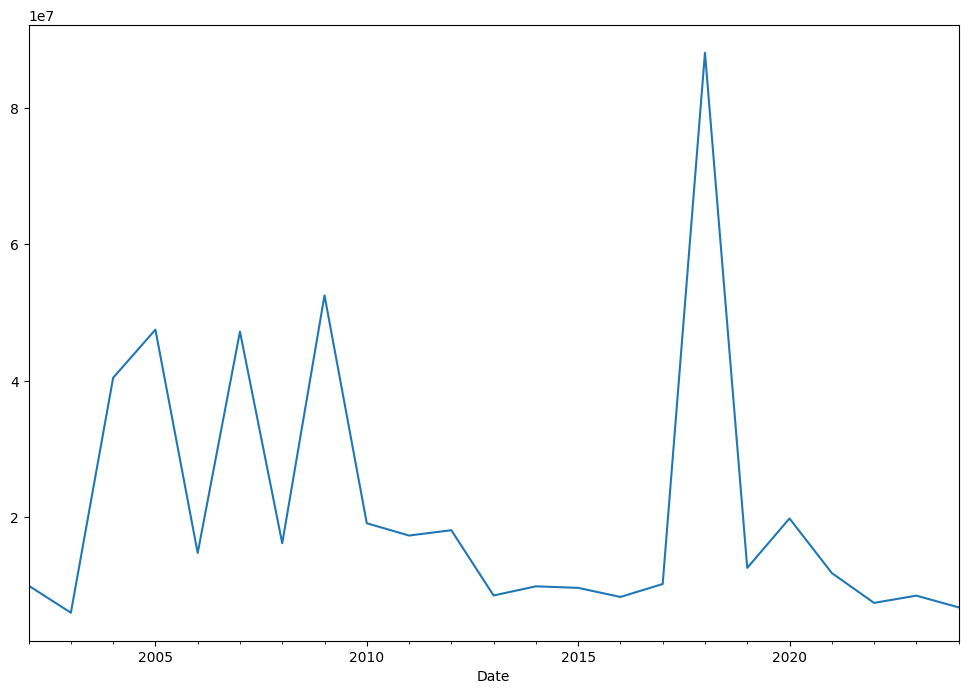

In [ ]:
#Year End Frequency
data.resample(rule = "A").max()["Volume"].plot(figsize = (12,8))

<Axes: xlabel='Date'>

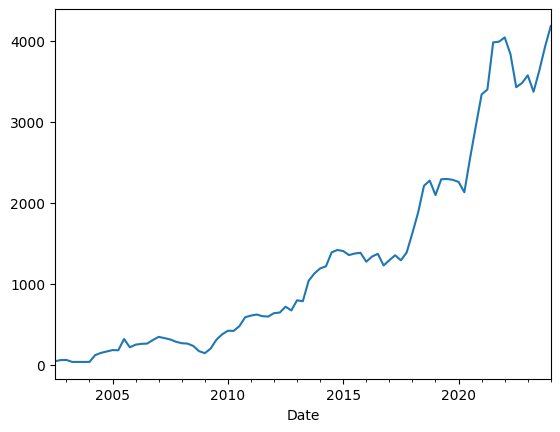

In [ ]:
#Quarterly Frequency
data.resample(rule = "QS").max()["High"].plot()

<Axes: xlabel='Date'>

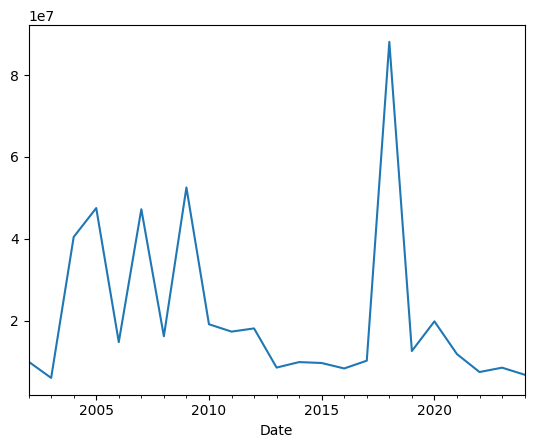

In [ ]:
##Business end freq
data.resample(rule = "BA").max()["Volume"].plot()

In [ ]:
#Business Quarterly End Freq
data.resample(rule = "BQS").max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-01,44.750000,45.974998,44.049999,44.500000,31.384108,6732480
2002-10-01,57.525002,61.087502,56.000000,60.112499,42.395004,9998480
2003-01-01,61.525002,62.924999,59.987499,61.087502,43.082607,6027072
2003-04-01,38.387501,38.387501,38.387501,38.387501,27.073200,0
2003-07-01,38.387501,38.387501,38.387501,38.387501,27.073200,0
...,...,...,...,...,...,...
2023-01-02,3549.000000,3575.000000,3527.000000,3558.050049,3497.326660,6739966
2023-04-03,3360.800049,3372.000000,3312.000000,3328.899902,3272.087158,5815424
2023-07-03,3602.500000,3633.750000,3580.000000,3606.149902,3580.253174,6306101


<Axes: xlabel='Date'>

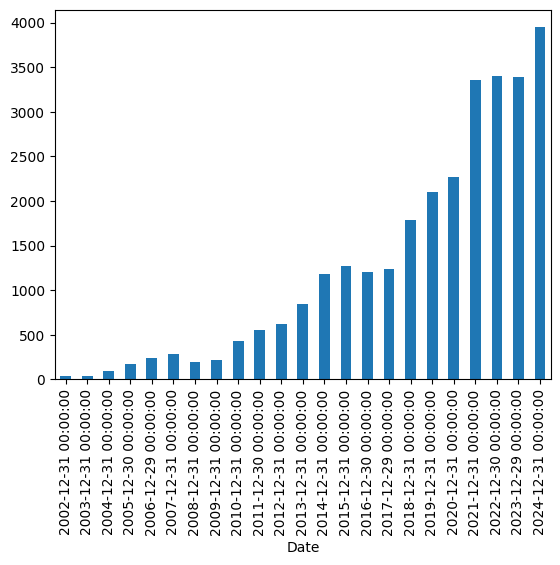

In [ ]:
data["Open"].resample(rule = "BA").mean().plot(kind = "bar")

Text(0.5, 0, 'Stock price open')

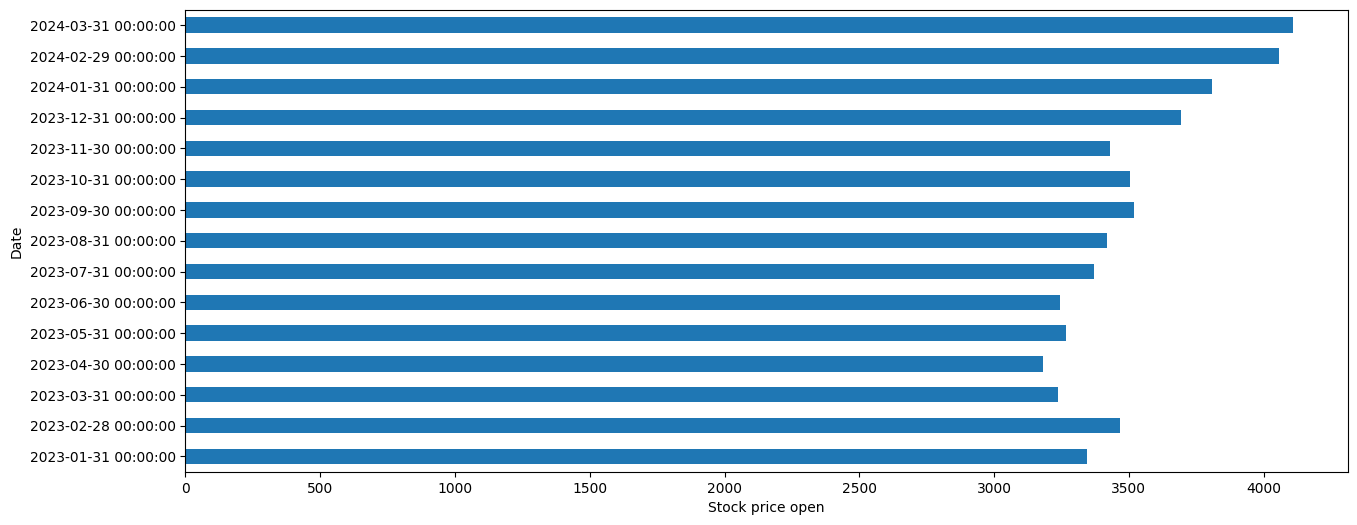

In [ ]:
data.loc["2023-01-01":"2024-03-01"]["Open"].resample(rule = "M").mean().plot(kind = "barh",figsize = (15,6))
plt.xlabel("Stock price open")

Moving Average

1. simple moving average

In [ ]:
##for close price
data["Rolling_close"] = data["Close"].rolling(10).mean()

<Axes: xlabel='Date'>

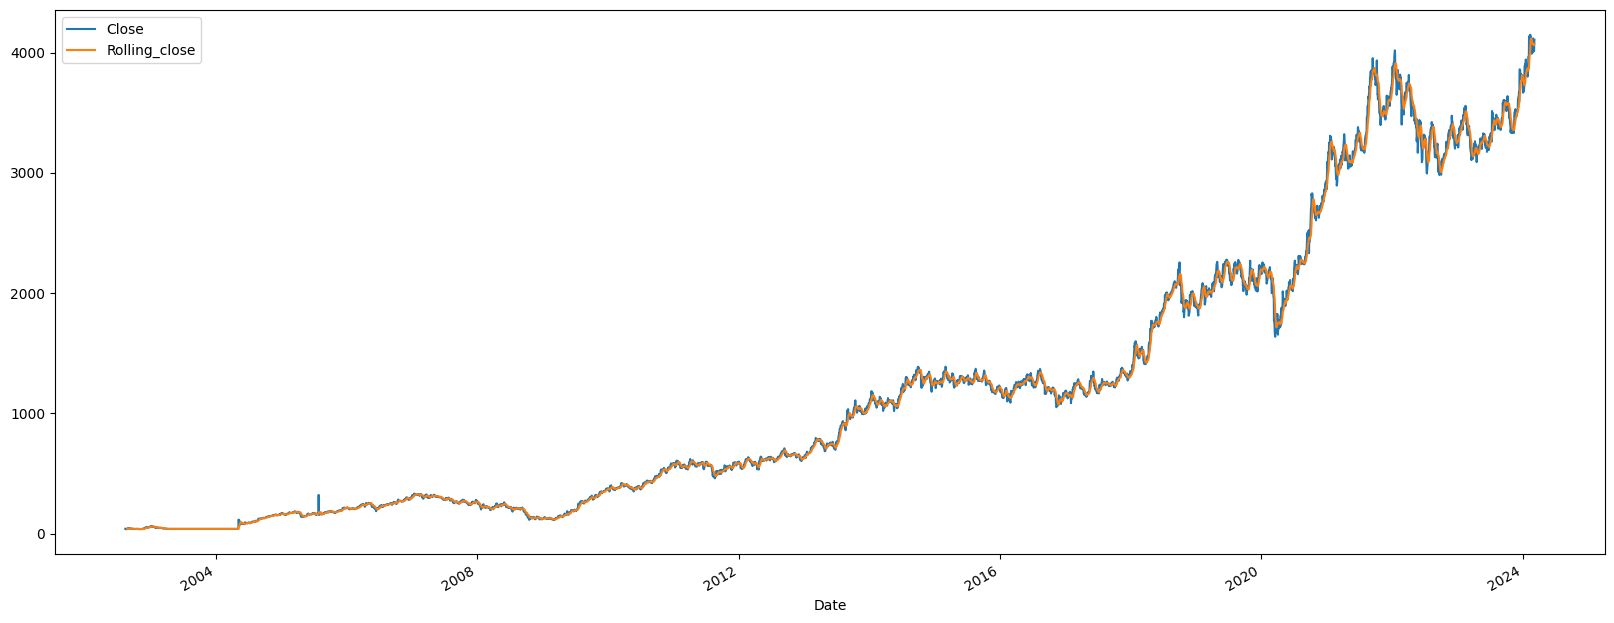

In [ ]:
data[["Close","Rolling_close"]].plot(figsize = (20,8))

2. Exponential moving average

<Axes: xlabel='Date'>

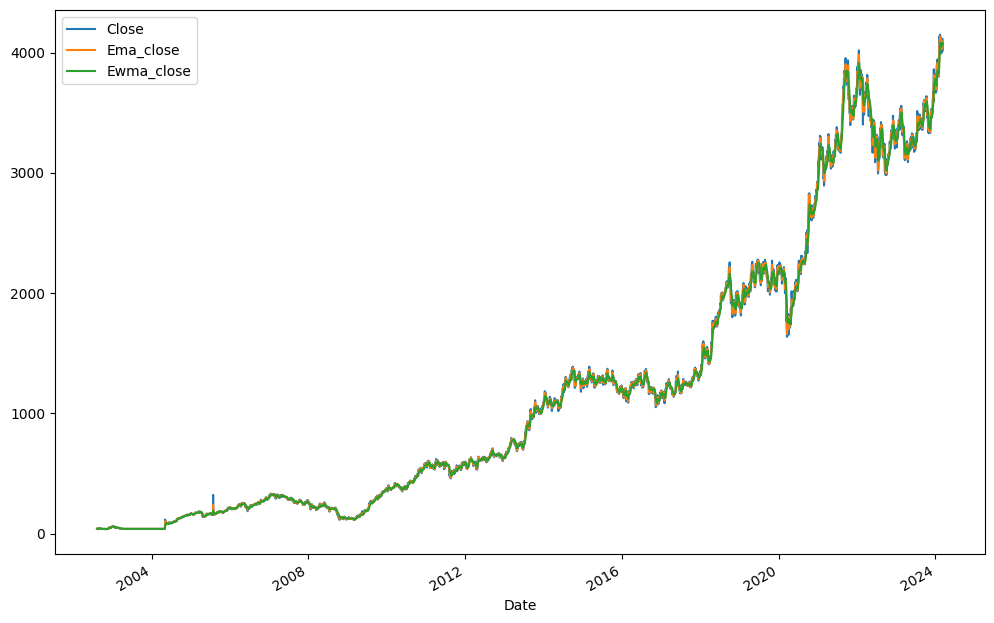

In [ ]:
data["Ema_close"] = data["Close"].ewm(alpha = 0.5,adjust = False).mean()
data["Ewma_close"] = data["Close"].ewm(span = 10).mean()
data[["Close","Ema_close","Ewma_close"]].plot(figsize = (12,8))
# plt.xlim(["2020-01-01","2024-03-01"])

In [ ]:
data = data.reset_index()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,27.998856,212976
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,27.619785,153576
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,25.715576,822776
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,25.715576,0
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,25.653870,811856


# Feature selection

In [ ]:
df = data["Close"]
df.head(5)

Date
2002-08-12    39.700001
2002-08-13    39.162498
2002-08-14    36.462502
2002-08-15    36.462502
2002-08-16    36.375000
Name: Close, dtype: float64

Train Test split: Try to scale all data

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df)*0.7)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size],df[training_size:len(df)]

In [ ]:
len(train_data),len(test_data)

(3757, 1611)

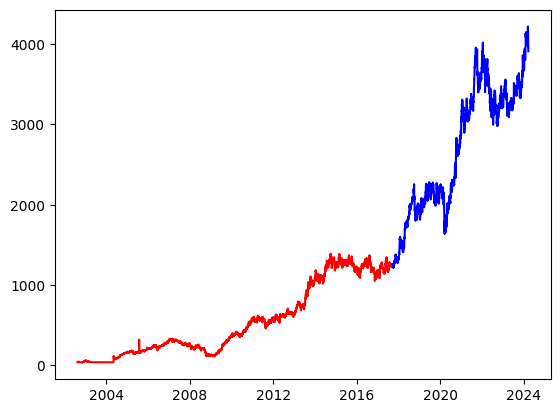

In [ ]:
plt.plot(train_data,color = "red")
plt.plot(test_data,color = "blue")

In [ ]:
train_data.values.reshape(-1,1)

array([[  39.70000076],
       [  39.16249847],
       [  36.46250153],
       ...,
       [1244.22497559],
       [1244.59997559],
       [1243.47497559]])

Feature Scaling

In [ ]:
# Data preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(np.array(train_data).reshape(-1,1))

In [ ]:
test_data = scaler.transform(np.array(test_data).reshape(-1,1))

In [ ]:
train_data,test_data

(array([[3.12378868e-03],
        [2.72638213e-03],
        [7.30118150e-04],
        ...,
        [8.93698805e-01],
        [8.93976064e-01],
        [8.93144286e-01]]),
 array([[0.90020519],
        [0.89761744],
        [0.89732168],
        ...,
        [2.90968736],
        [2.91120308],
        [2.86532589]]))

Creating sequential data of 50 days

In [ ]:
# Function to create sequences for time series prediction
def create_sequences(data, seq_length):
    sequences = []
    target = []
    for i in range(len(data) - seq_length-1):
        seq = data[i:i+seq_length,0]
        label = data[i+seq_length,0]
        sequences.append(seq)
        target.append(label)
    return np.array(sequences), np.array(target)


In [ ]:
#Time stamps/seq_length
t = 50
X_train,y_train = create_sequences(train_data,t)
X_test,y_test = create_sequences(test_data,t)


In [ ]:
X_train.shape,y_train.shape

((3706, 50), (3706,))

In [ ]:
X_test.shape,y_test.shape

((1560, 50), (1560,))

Reshaping the data

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_train.shape,X_test.shape

((3706, 50, 1), (1560, 50, 1))

# Neural Network models

## Model Building

### CNN

In [ ]:
# Define the CNN model
i = Input(shape = (X_train.shape[1],1))
x = Conv1D(filters = 32,kernel_size = 3,activation = "relu")(i)
x = Flatten()(x)
x = Dense(1)(x)
cnn_model = Model(i,x)

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')
cnn_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 48, 32)            128       
                                                                 
 flatten_1 (Flatten)         (None, 1536)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1537      
                                                                 
Total params: 1665 (6.50 KB)
Trainable params: 1665 (6.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
cnn_model.fit(X_train, y_train, epochs=100,validation_data=(X_test, y_test))

Epoch 1/100
116/116 [==============================] - 4s 13ms/step - loss: 0.0048 - val_loss: 0.0126
Epoch 2/100
116/116 [==============================] - 1s 10ms/step - loss: 6.8314e-04 - val_loss: 0.0118
Epoch 3/100
116/116 [==============================] - 1s 8ms/step - loss: 6.3334e-04 - val_loss: 0.0109
Epoch 4/100
116/116 [==============================] - 1s 7ms/step - loss: 5.8329e-04 - val_loss: 0.0090
Epoch 5/100
116/116 [==============================] - 0s 3ms/step - loss: 4.9360e-04 - val_loss: 0.0073
Epoch 6/100
116/116 [==============================] - 0s 3ms/step - loss: 4.3871e-04 - val_loss: 0.0078
Epoch 7/100
116/116 [==============================] - 0s 4ms/step - loss: 4.3791e-04 - val_loss: 0.0067
Epoch 8/100
116/116 [==============================] - 0s 3ms/step - loss: 3.6439e-04 - val_loss: 0.0055
Epoch 9/100
116/116 [==============================] - 0s 4ms/step - loss: 3.6535e-04 - val_loss: 0.0055
Epoch 10/100
116/116 [==============================] - 0

In [ ]:
#Model prediction
train_predict=cnn_model.predict(X_train)
test_predict=cnn_model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


49/49 [==============================] - 0s 4ms/step


In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(scaler.inverse_transform(y_train.reshape(-1,1)),train_predict))

12.67458267777157

In [ ]:
### Test Data RMSE
cnn_rmse = math.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1,1)),test_predict))
cnn_rmse

97.07235872542118

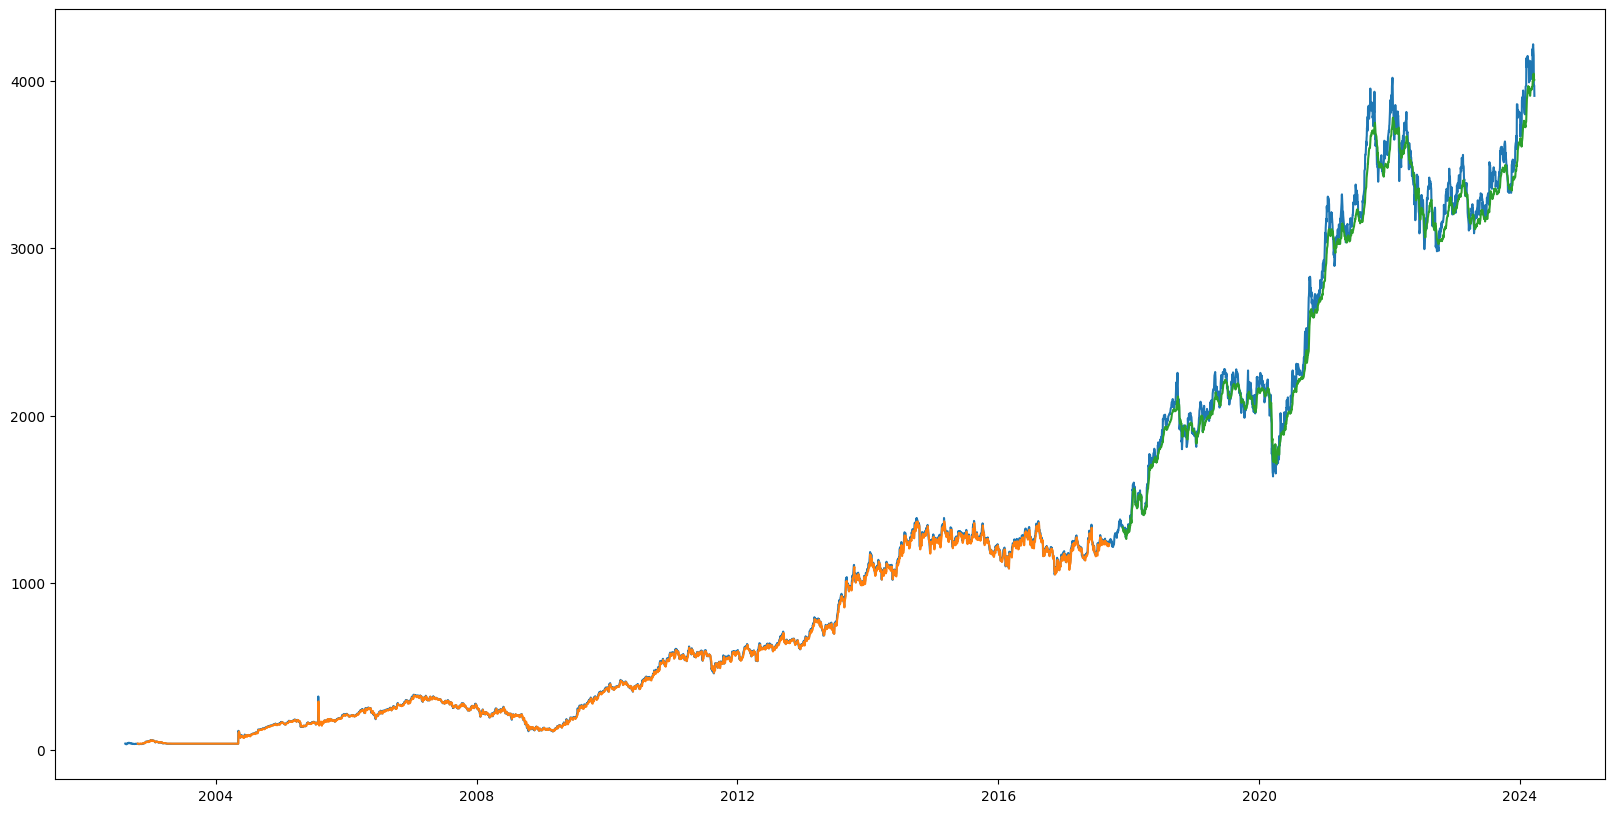

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=50
trainPredictPlot = np.empty_like(df).reshape(-1,1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df).reshape(-1,1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(df)
plt.plot(df.index,trainPredictPlot)
plt.plot(df.index,testPredictPlot)
plt.show()
# # shift train predictions for plotting
# look_back=50
# trainPredictPlot = np.empty_like(df).reshape(-1,1)
# trainPredictPlot[:,:] = np.nan
# trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
# # shift test predictions for plotting
# testPredictPlot = np.empty_like(df).reshape(-1,1)
# testPredictPlot[:, :] = np.nan
# testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# # plot baseline and predictions
# plt.plot(df)
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()

### RNN

In [ ]:
#Model building:
i = Input(shape = (X_train.shape[1],1))
x = SimpleRNN(32,activation = "relu")(i)
x = Dense(1)(x)
rnn_model = Model(i,x)
rnn_model.compile(optimizer = "adam",loss = "mse")
rnn_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
r = rnn_model.fit(X_train,y_train,epochs = 100,validation_data = (X_test,y_test))

Epoch 1/100
116/116 [==============================] - 6s 20ms/step - loss: 0.0314 - val_loss: 0.0029
Epoch 2/100
116/116 [==============================] - 2s 17ms/step - loss: 8.9814e-05 - val_loss: 0.0026
Epoch 3/100
116/116 [==============================] - 2s 19ms/step - loss: 9.5148e-05 - val_loss: 0.0031
Epoch 4/100
116/116 [==============================] - 2s 20ms/step - loss: 9.0909e-05 - val_loss: 0.0038
Epoch 5/100
116/116 [==============================] - 3s 28ms/step - loss: 8.9494e-05 - val_loss: 0.0024
Epoch 6/100
116/116 [==============================] - 3s 28ms/step - loss: 9.7398e-05 - val_loss: 0.0024
Epoch 7/100
116/116 [==============================] - 3s 22ms/step - loss: 9.3429e-05 - val_loss: 0.0024
Epoch 8/100
116/116 [==============================] - 3s 23ms/step - loss: 9.0312e-05 - val_loss: 0.0020
Epoch 9/100
116/116 [==============================] - 3s 27ms/step - loss: 9.0952e-05 - val_loss: 0.0029
Epoch 10/100
116/116 [============================

In [ ]:
#Model prediction
train_predict=rnn_model.predict(X_train)
test_predict=rnn_model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


49/49 [==============================] - 0s 6ms/step


In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(scaler.inverse_transform(y_train.reshape(-1,1)),train_predict))

11.894914352850398

In [ ]:
### Test Data RMSE
rnn_rmse = math.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1,1)),test_predict))


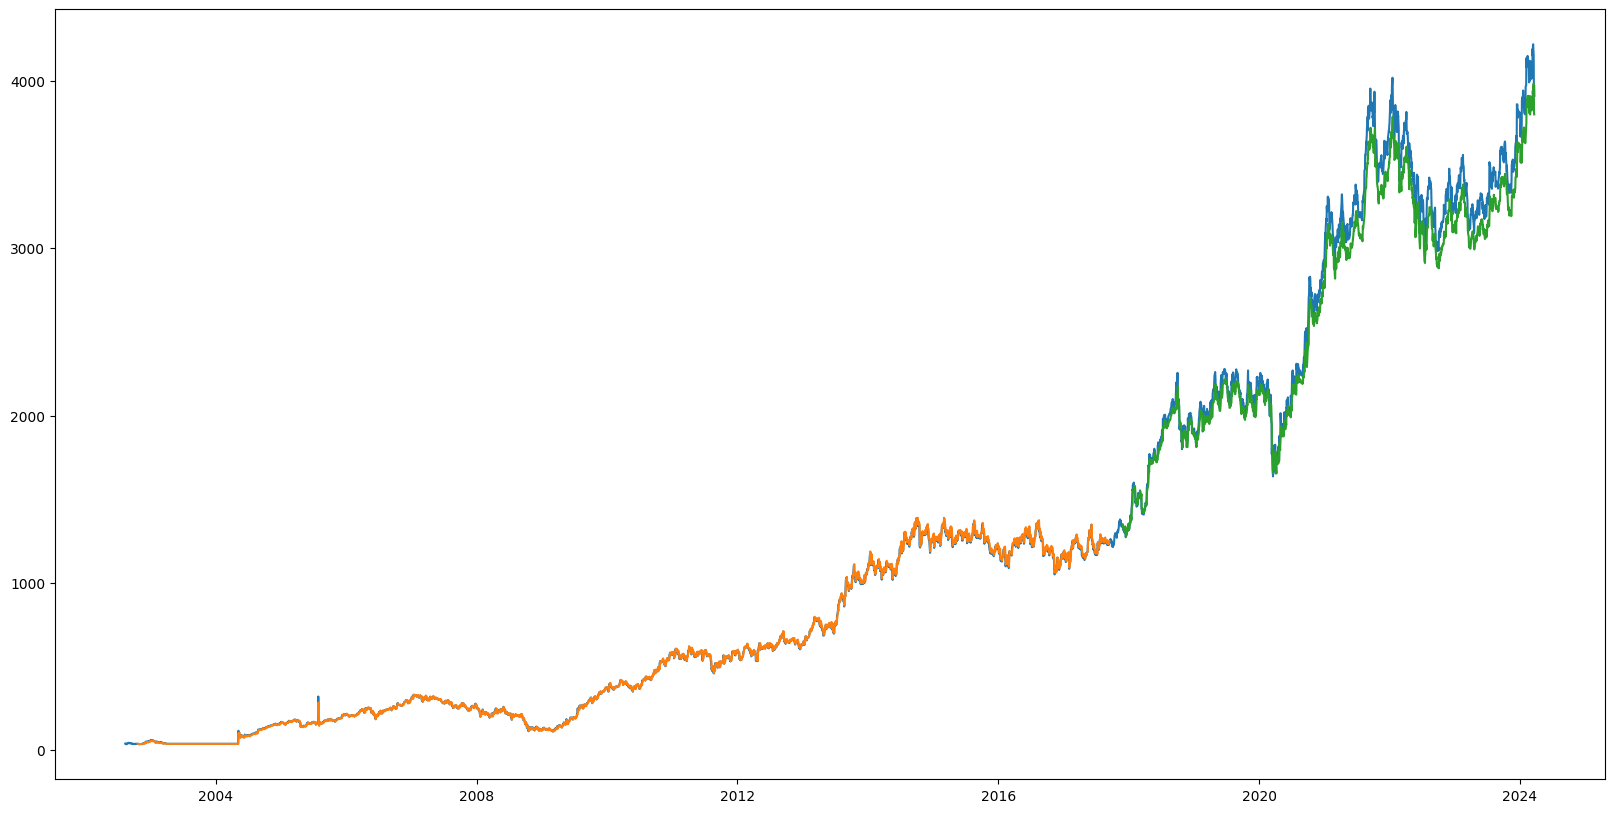

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=50
trainPredictPlot = np.empty_like(df).reshape(-1,1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df).reshape(-1,1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(df)
plt.plot(df.index,trainPredictPlot)
plt.plot(df.index,testPredictPlot)
plt.show()

In [ ]:
df

Date
2002-08-12      39.700001
2002-08-13      39.162498
2002-08-14      36.462502
2002-08-15      36.462502
2002-08-16      36.375000
                 ...     
2024-03-18    4152.500000
2024-03-19    3977.300049
2024-03-20    3970.899902
2024-03-21    3972.949951
2024-03-22    3910.899902
Name: Close, Length: 5368, dtype: float64

### LSTM

In [ ]:
#Model building:
i = Input(shape = (X_train.shape[1],1))
x = LSTM(32)(i)
x = Dense(1)(x)
lstm_model = Model(i,x)
lstm_model.compile(optimizer = "adam",loss = "mse")
lstm_model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 50, 1)]           0         
                                                                 
 lstm_7 (LSTM)               (None, 32)                4352      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4385 (17.13 KB)
Trainable params: 4385 (17.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
r = lstm_model.fit(X_train,y_train,epochs = 100,validation_data = (X_test,y_test))

Epoch 1/100
116/116 [==============================] - 10s 44ms/step - loss: 0.0126 - val_loss: 0.4126
Epoch 2/100
116/116 [==============================] - 3s 22ms/step - loss: 3.3185e-04 - val_loss: 0.4407
Epoch 3/100
116/116 [==============================] - 2s 21ms/step - loss: 3.1064e-04 - val_loss: 0.4524
Epoch 4/100
116/116 [==============================] - 4s 31ms/step - loss: 3.0578e-04 - val_loss: 0.4389
Epoch 5/100
116/116 [==============================] - 3s 22ms/step - loss: 2.9848e-04 - val_loss: 0.4033
Epoch 6/100
116/116 [==============================] - 2s 21ms/step - loss: 3.0010e-04 - val_loss: 0.3999
Epoch 7/100
116/116 [==============================] - 2s 21ms/step - loss: 2.9193e-04 - val_loss: 0.3567
Epoch 8/100
116/116 [==============================] - 2s 21ms/step - loss: 2.7722e-04 - val_loss: 0.3517
Epoch 9/100
116/116 [==============================] - 3s 29ms/step - loss: 2.7657e-04 - val_loss: 0.3249
Epoch 10/100
116/116 [===========================

In [ ]:
#Model prediction
train_predict=lstm_model.predict(X_train)
test_predict=lstm_model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


49/49 [==============================] - 0s 7ms/step


In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(scaler.inverse_transform(y_train.reshape(-1,1)),train_predict))

13.717904112906485

In [ ]:
### Test Data RMSE
lstm_rmse = math.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1,1)),test_predict))


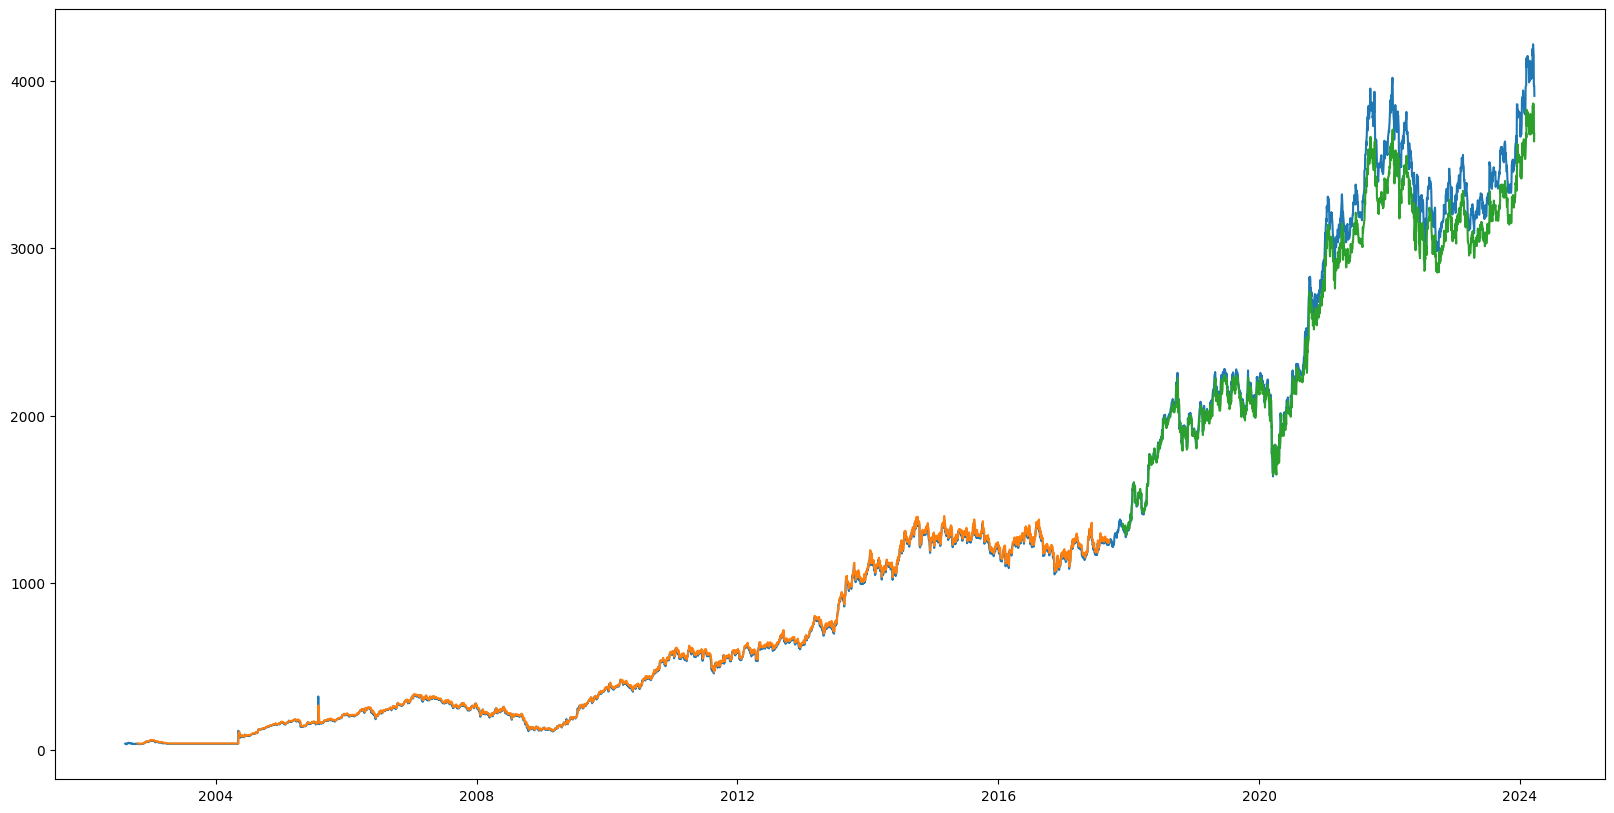

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=50
trainPredictPlot = np.empty_like(df).reshape(-1,1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df).reshape(-1,1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(df)
plt.plot(df.index,trainPredictPlot)
plt.plot(df.index,testPredictPlot)
plt.show()

### GRU

In [ ]:
#Model building:
i = Input(shape = (X_train.shape[1],1))
x = GRU(32)(i)
x = Dense(1)(x)
gru_model = Model(i,x)
gru_model.compile(optimizer = "adam",loss = "mse")
gru_model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 gru_1 (GRU)                 (None, 32)                3360      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
r = gru_model.fit(X_train,y_train,epochs = 100,validation_data = (X_test,y_test))

Epoch 1/100
116/116 [==============================] - 6s 29ms/step - loss: 0.0291 - val_loss: 0.0965
Epoch 2/100
116/116 [==============================] - 3s 24ms/step - loss: 1.7461e-04 - val_loss: 0.1056
Epoch 3/100
116/116 [==============================] - 3s 22ms/step - loss: 1.5619e-04 - val_loss: 0.1174
Epoch 4/100
116/116 [==============================] - 3s 27ms/step - loss: 1.3905e-04 - val_loss: 0.1246
Epoch 5/100
116/116 [==============================] - 3s 27ms/step - loss: 1.2689e-04 - val_loss: 0.1248
Epoch 6/100
116/116 [==============================] - 3s 24ms/step - loss: 1.1664e-04 - val_loss: 0.1303
Epoch 7/100
116/116 [==============================] - 3s 27ms/step - loss: 1.0951e-04 - val_loss: 0.1273
Epoch 8/100
116/116 [==============================] - 3s 27ms/step - loss: 1.0502e-04 - val_loss: 0.1293
Epoch 9/100
116/116 [==============================] - 3s 27ms/step - loss: 1.0015e-04 - val_loss: 0.1270
Epoch 10/100
116/116 [============================

In [ ]:
#Model prediction
train_predict=gru_model.predict(X_train)
test_predict=gru_model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


49/49 [==============================] - 0s 6ms/step


In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(scaler.inverse_transform(y_train.reshape(-1,1)),train_predict))

12.345711410648478

In [ ]:
### Test Data RMSE
gru_rmse = math.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1,1)),test_predict))


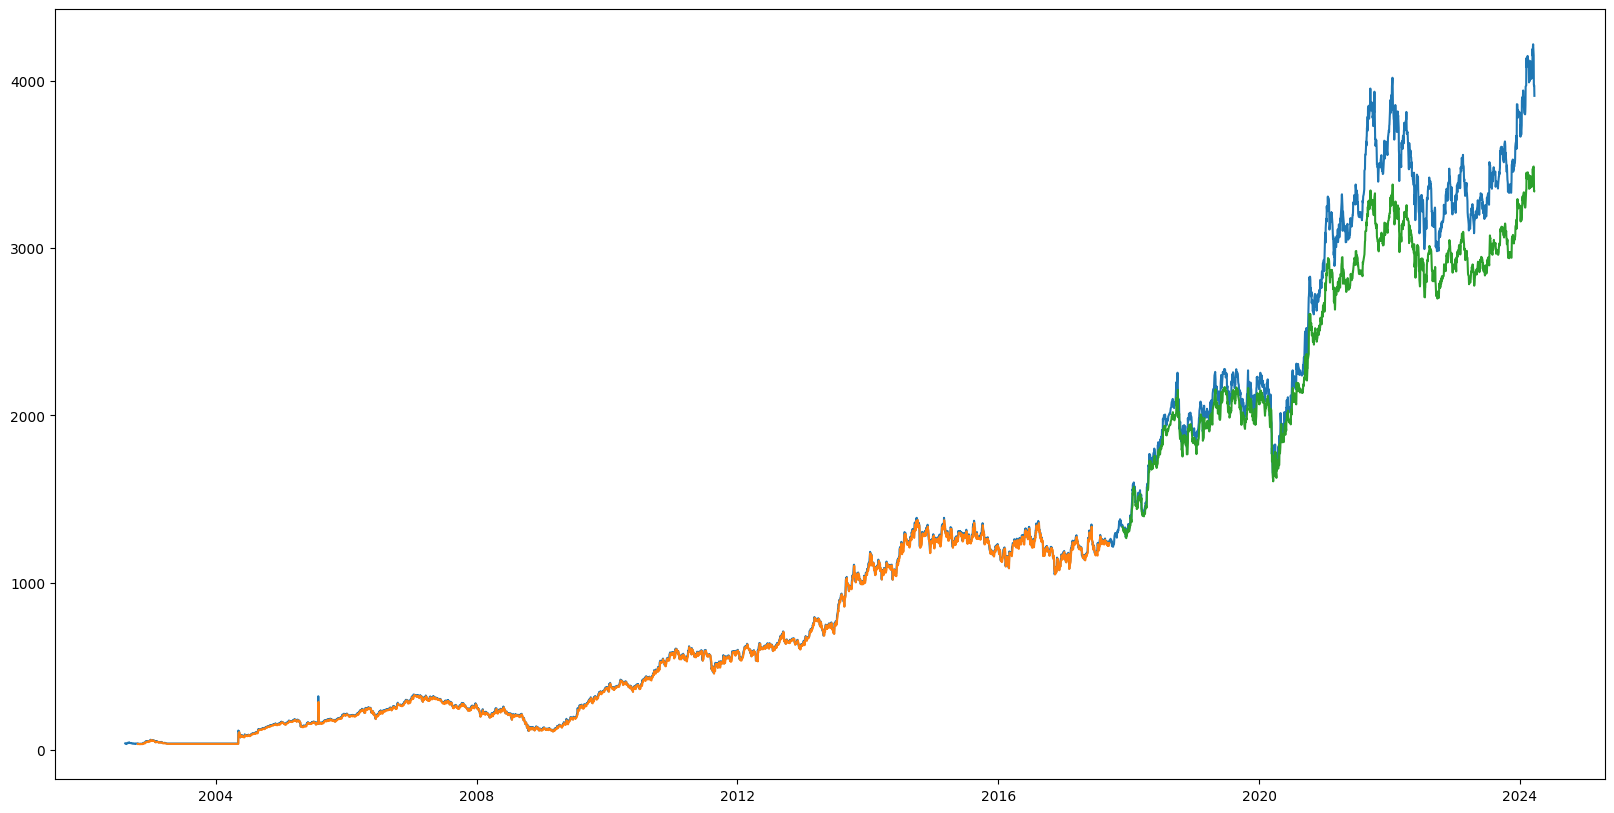

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=50
trainPredictPlot = np.empty_like(df).reshape(-1,1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df).reshape(-1,1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(df)
plt.plot(df.index,trainPredictPlot)
plt.plot(df.index,testPredictPlot)
plt.show()

### Bi-LSTM

In [ ]:
#Model building:
i = Input(shape = (X_train.shape[1],1))
x = Bidirectional(LSTM(64))(i)
x = Dense(1)(x)
bi_lstm_model = Model(i,x)
bi_lstm_model.compile(optimizer = "adam",loss = "mse")
bi_lstm_model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               33792     
 onal)                                                           
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 33921 (132.50 KB)
Trainable params: 33921 (132.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
r = bi_lstm_model.fit(X_train,y_train,epochs = 100,validation_data = (X_test,y_test))

Epoch 1/100
116/116 [==============================] - 12s 58ms/step - loss: 0.0076 - val_loss: 0.1019
Epoch 2/100
116/116 [==============================] - 6s 56ms/step - loss: 4.3875e-04 - val_loss: 0.1252
Epoch 3/100
116/116 [==============================] - 5s 45ms/step - loss: 3.9163e-04 - val_loss: 0.1444
Epoch 4/100
116/116 [==============================] - 7s 59ms/step - loss: 3.5557e-04 - val_loss: 0.1156
Epoch 5/100
116/116 [==============================] - 5s 44ms/step - loss: 3.1607e-04 - val_loss: 0.1128
Epoch 6/100
116/116 [==============================] - 6s 55ms/step - loss: 3.5551e-04 - val_loss: 0.1050
Epoch 7/100
116/116 [==============================] - 5s 47ms/step - loss: 2.7538e-04 - val_loss: 0.0728
Epoch 8/100
116/116 [==============================] - 5s 44ms/step - loss: 2.5715e-04 - val_loss: 0.0822
Epoch 9/100
116/116 [==============================] - 6s 54ms/step - loss: 2.4191e-04 - val_loss: 0.0598
Epoch 10/100
116/116 [===========================

In [ ]:
#Model prediction
train_predict=bi_lstm_model.predict(X_train)
test_predict=bi_lstm_model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


49/49 [==============================] - 1s 15ms/step


In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(scaler.inverse_transform(y_train.reshape(-1,1)),train_predict))

11.941746119762366

In [ ]:
### Test Data RMSE
bi_lstm_rmse = math.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1,1)),test_predict))


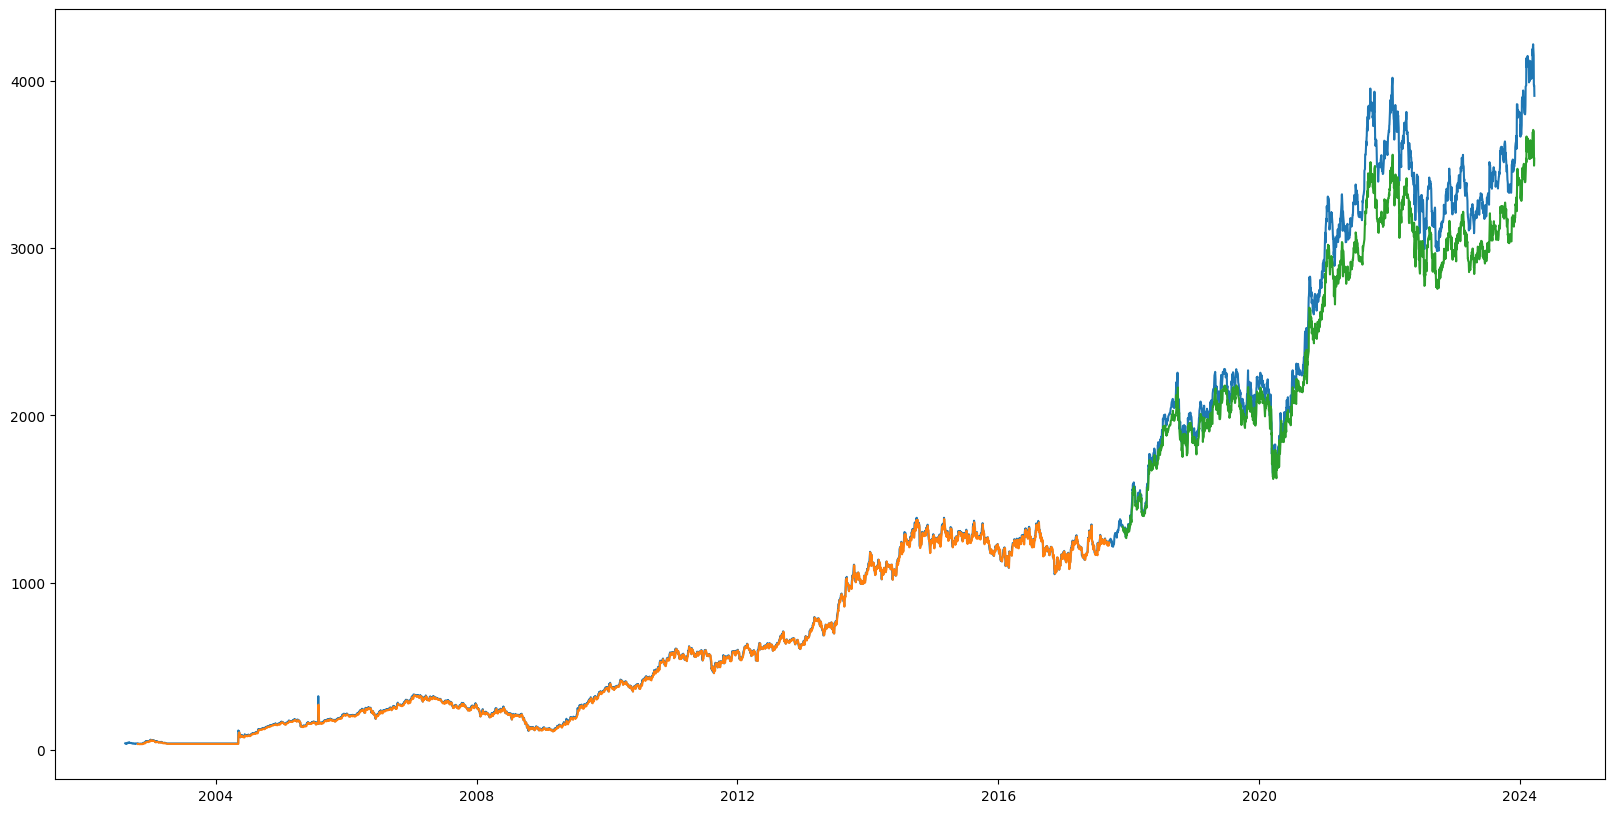

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=50
trainPredictPlot = np.empty_like(df).reshape(-1,1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df).reshape(-1,1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(df)
plt.plot(df.index,trainPredictPlot)
plt.plot(df.index,testPredictPlot)
plt.show()

### Combining different networks for model

In [ ]:
#Model building:
i = Input(shape = (X_train.shape[1],1))
x_bi = Bidirectional(LSTM(32))(i)
x_l = LSTM(32)(i)
x = Concatenate()([x_bi,x_l])
x = Dense(1)(x)
combined_model = Model(i,x)
combined_model.compile(optimizer = "adam",loss = "mse")
combined_model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 50, 1)]              0         []                            
                                                                                                  
 bidirectional_2 (Bidirecti  (None, 64)                   8704      ['input_10[0][0]']            
 onal)                                                                                            
                                                                                                  
 lstm_5 (LSTM)               (None, 32)                   4352      ['input_10[0][0]']            
                                                                                                  
 concatenate (Concatenate)   (None, 96)                   0         ['bidirectional_2[0][0]'

In [ ]:
r = combined_model.fit(X_train,y_train,epochs = 100,validation_data = (X_test,y_test))

Epoch 1/100
116/116 [==============================] - 15s 79ms/step - loss: 0.0135 - val_loss: 0.2649
Epoch 2/100
116/116 [==============================] - 6s 54ms/step - loss: 5.1041e-04 - val_loss: 0.3088
Epoch 3/100
116/116 [==============================] - 7s 63ms/step - loss: 4.6007e-04 - val_loss: 0.3258
Epoch 4/100
116/116 [==============================] - 7s 57ms/step - loss: 4.0655e-04 - val_loss: 0.3482
Epoch 5/100
116/116 [==============================] - 7s 60ms/step - loss: 3.7934e-04 - val_loss: 0.3224
Epoch 6/100
116/116 [==============================] - 7s 60ms/step - loss: 3.4669e-04 - val_loss: 0.3114
Epoch 7/100
116/116 [==============================] - 6s 53ms/step - loss: 3.2333e-04 - val_loss: 0.2989
Epoch 8/100
116/116 [==============================] - 7s 61ms/step - loss: 3.1949e-04 - val_loss: 0.2585
Epoch 9/100
116/116 [==============================] - 6s 54ms/step - loss: 3.0003e-04 - val_loss: 0.2487
Epoch 10/100
116/116 [===========================

In [ ]:
#Model prediction
train_predict=combined_model.predict(X_train)
test_predict=combined_model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


49/49 [==============================] - 1s 23ms/step


In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(scaler.inverse_transform(y_train.reshape(-1,1)),train_predict))

11.47843691316156

In [ ]:
### Test Data RMSE
combined_rmse = math.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1,1)),test_predict))


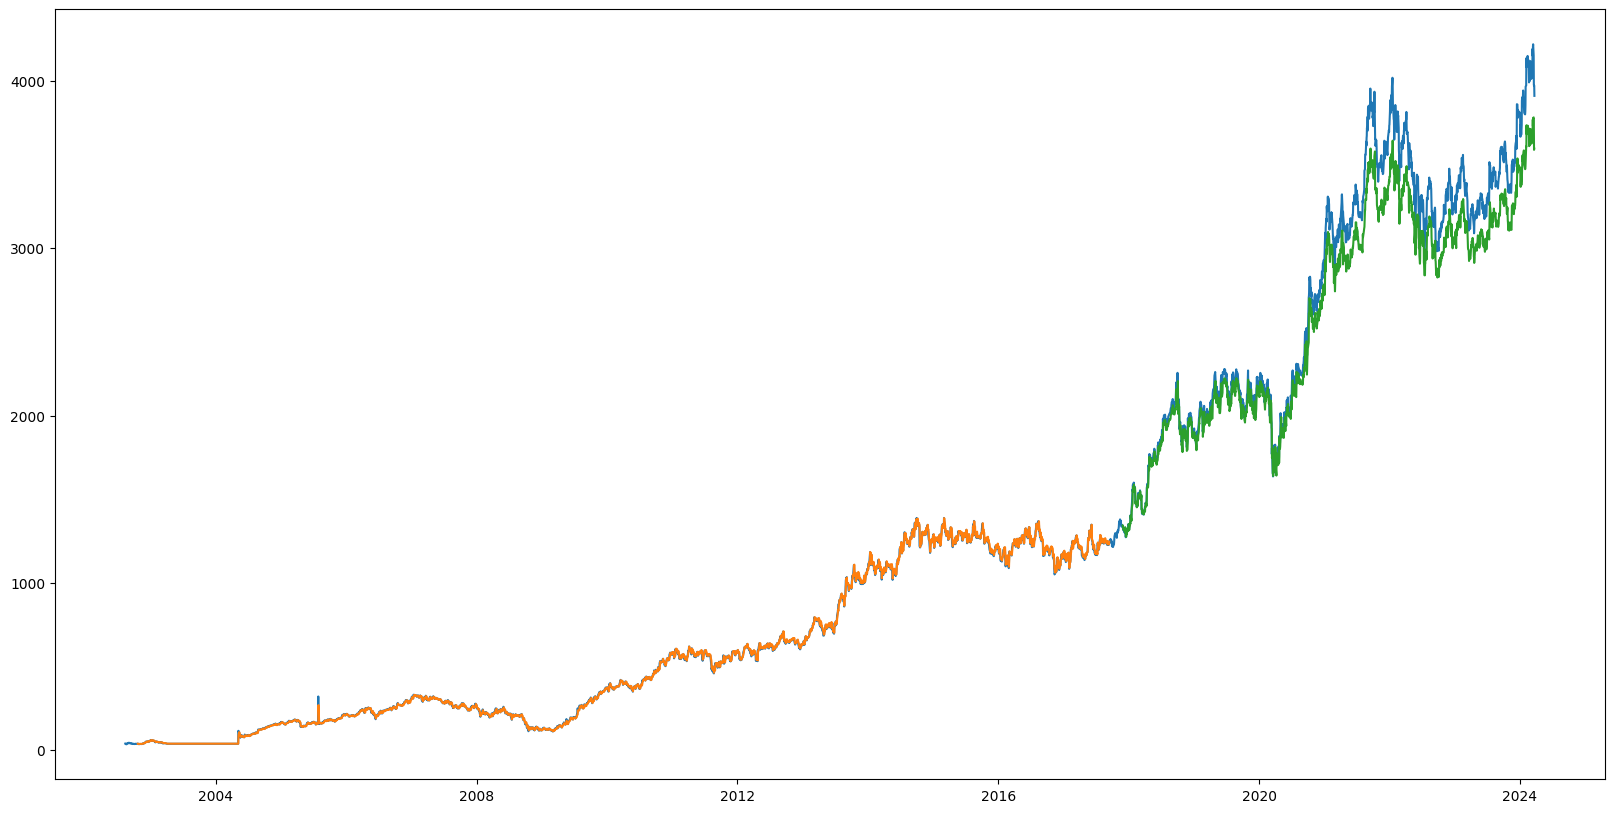

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=50
trainPredictPlot = np.empty_like(df).reshape(-1,1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df).reshape(-1,1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(df)
plt.plot(df.index,trainPredictPlot)
plt.plot(df.index,testPredictPlot)
plt.show()


### Stacked LSTM approach

In [ ]:
i = Input(shape = (X_train.shape[1],1))
x = LSTM(50,return_sequences=True)(i)
x = LSTM(50,return_sequences=True)(x)
x = LSTM(50)(x)
x = Dense(1)(x)
stacked_lstm_model=Model(i,x)
stacked_lstm_model.compile(loss='mean_squared_error',optimizer='adam')
stacked_lstm_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 lstm_3 (LSTM)               (None, 50, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
r = stacked_lstm_model.fit(X_train, y_train, epochs=100,validation_data=(X_test, y_test),batch_size=64,verbose=1)

Epoch 1/100
58/58 [==============================] - 17s 142ms/step - loss: 0.0180 - val_loss: 0.4414
Epoch 2/100
58/58 [==============================] - 6s 99ms/step - loss: 4.5450e-04 - val_loss: 0.4823
Epoch 3/100
58/58 [==============================] - 7s 118ms/step - loss: 4.4063e-04 - val_loss: 0.4537
Epoch 4/100
58/58 [==============================] - 6s 99ms/step - loss: 4.2799e-04 - val_loss: 0.4245
Epoch 5/100
58/58 [==============================] - 7s 116ms/step - loss: 4.4469e-04 - val_loss: 0.4333
Epoch 6/100
58/58 [==============================] - 6s 98ms/step - loss: 4.2010e-04 - val_loss: 0.4420
Epoch 7/100
58/58 [==============================] - 8s 139ms/step - loss: 4.2004e-04 - val_loss: 0.4022
Epoch 8/100
58/58 [==============================] - 6s 97ms/step - loss: 4.2363e-04 - val_loss: 0.3996
Epoch 9/100
58/58 [==============================] - 7s 126ms/step - loss: 4.1066e-04 - val_loss: 0.3716
Epoch 10/100
58/58 [==============================] - 6s 99ms/

In [ ]:
#Model prediction
train_predict=stacked_lstm_model.predict(X_train)
test_predict=stacked_lstm_model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


49/49 [==============================] - 1s 22ms/step


In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(scaler.inverse_transform(y_train.reshape(-1,1)),train_predict))

17.110617180684564

In [ ]:
### Test Data RMSE
st_lstm_rmse = math.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1,1)),test_predict))
st_lstm_rmse

384.3034450099311

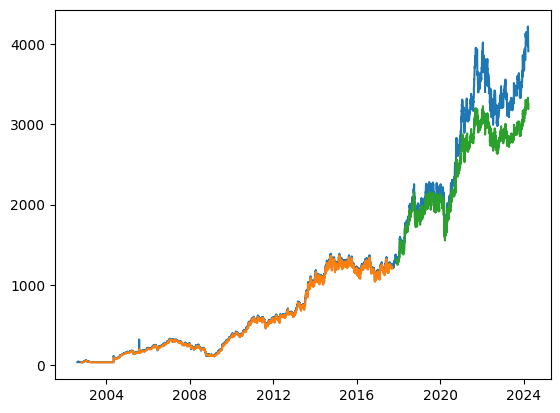

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=50
trainPredictPlot = np.empty_like(df).reshape(-1,1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df).reshape(-1,1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(df)
plt.plot(df.index,trainPredictPlot)
plt.plot(df.index,testPredictPlot)
plt.show()
# # shift train predictions for plotting
# look_back=50
# trainPredictPlot = np.empty_like(df).reshape(-1,1)
# trainPredictPlot[:,:] = np.nan
# trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
# # shift test predictions for plotting
# testPredictPlot = np.empty_like(df).reshape(-1,1)
# testPredictPlot[:, :] = np.nan
# testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# # plot baseline and predictions
# plt.plot(df)
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()

# Time series Models


## ARIMA Model

<Axes: ylabel='Density'>

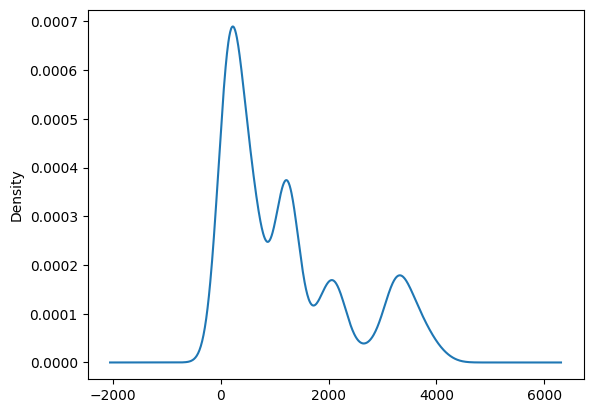

In [ ]:
df_close = data["Close"]
df_close.plot(kind = "kde")

In [ ]:
# ADF Test
#Its not stationary data
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
  result = adfuller(series)
  print(f"ADF statistics: {result[0]}")
  print(f"P-Value : {result[1]}")
  if result[1]<=0.05:
    print("Reject null hypothesis, time series has no unit root , data is stationary")
  else:
    print("Fail to reject null hypothesis, time series has unit root, data is not stationary")
adf_test(df_close)

ADF statistics: 1.716580697326757
P-Value : 0.9981683877740071
Fail to reject null hypothesis, time series has unit root, data is not stationary


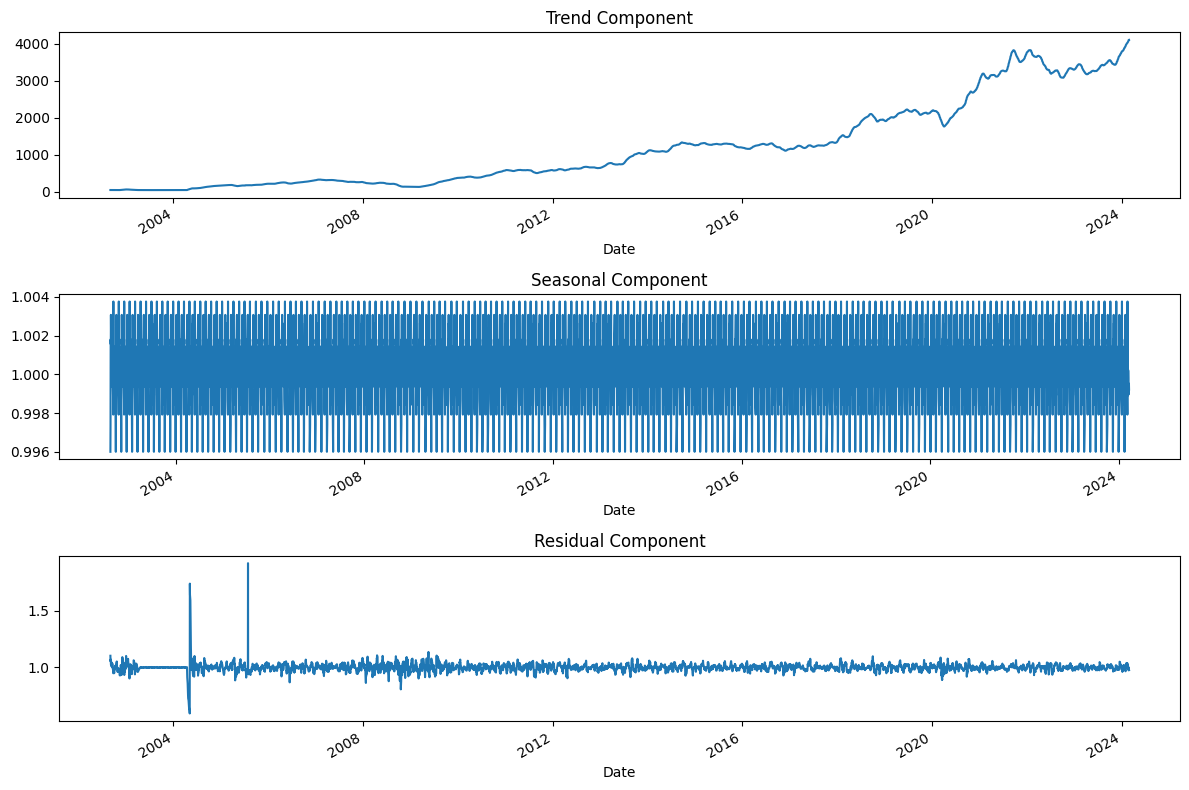

In [ ]:
# Perform seasonal decomposition
result = seasonal_decompose(df_close, period=30, model='multiplicative')

# Plot the decomposed components
fig, axs = plt.subplots(3, 1, figsize=(12, 8))

# Plot the trend component
result.trend.plot(ax=axs[0], label='Trend')
axs[0].set_title('Trend Component')

# Plot the seasonal component
result.seasonal.plot(ax=axs[1], label='Seasonality')
axs[1].set_title('Seasonal Component')

# Plot the residual component
result.resid.plot(ax=axs[2], label='Residuals')
axs[2].set_title('Residual Component')

plt.tight_layout()
plt.show()


In [ ]:
from pylab import rcParams
rcParams["figure.figsize"] = 20,10
df_close_log = np.log(df_close)
df_close_diff = df_close.diff().dropna()
ma = df_close.rolling(12).mean()
stationary_close = df_close_log - ma
stationary_close.dropna(inplace = True)
adf_test(df_close_diff)

ADF statistics: -16.593532339722277
P-Value : 1.7901848225028927e-29
Reject null hypothesis, time series has no unit root , data is stationary


<Axes: xlabel='Date'>

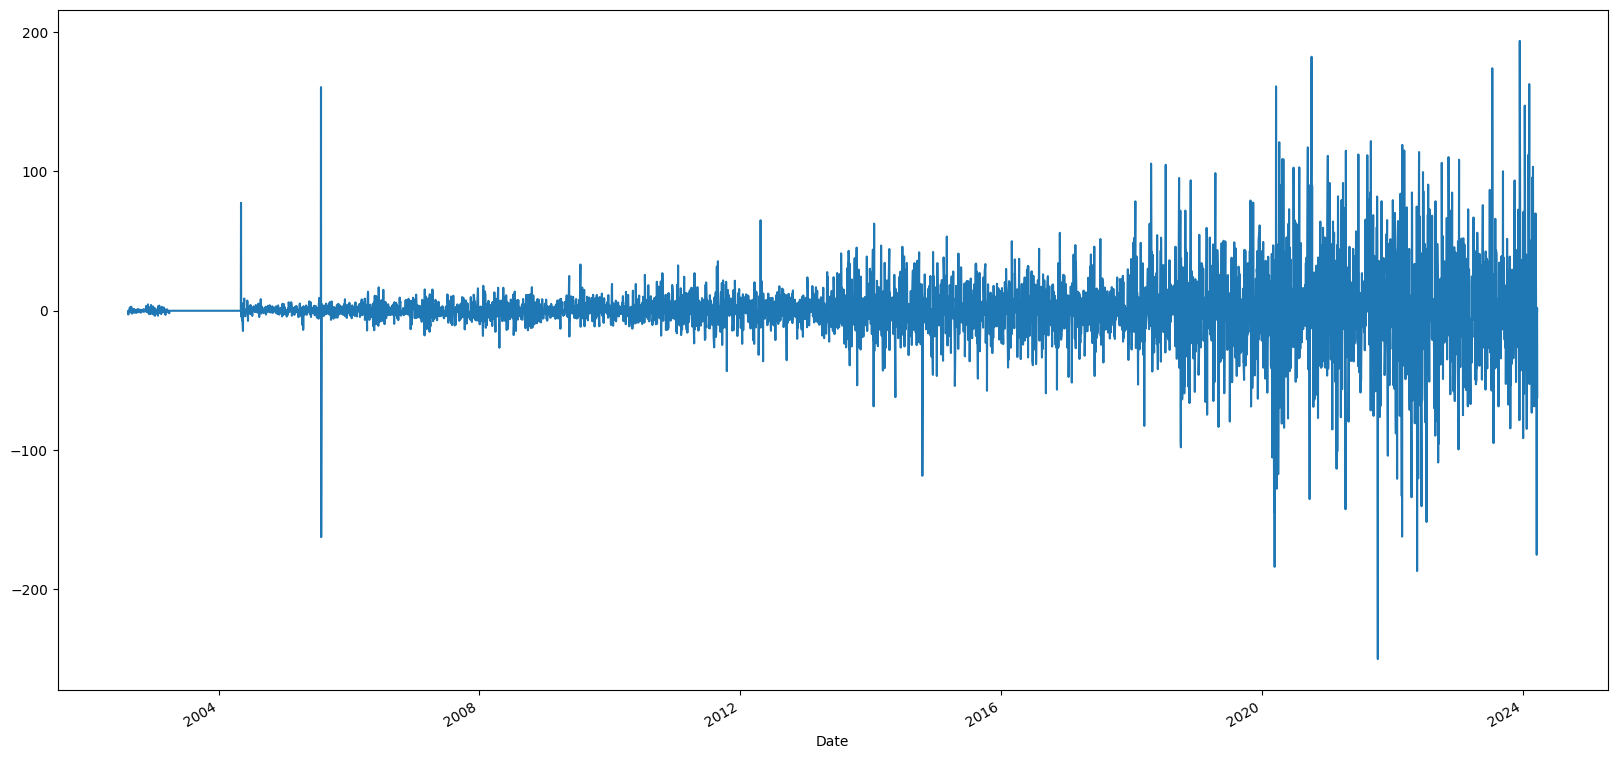

In [ ]:
df_close_diff.plot()

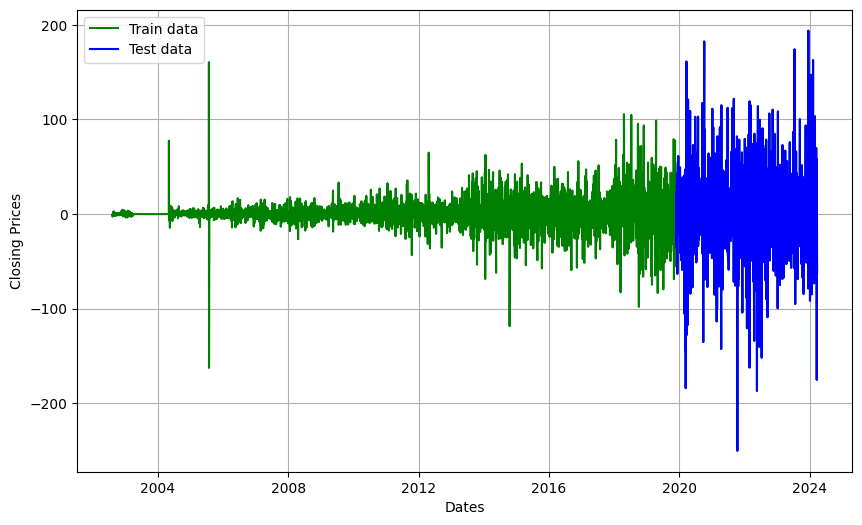

In [ ]:
#split data into train and training set
train_data, test_data = df_close_diff[:int(len(df_close_diff)*0.8)], df_close_diff[int(len(df_close_diff)*0.8):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_close_diff, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()



In [ ]:
#Modeling
# Build Model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(1,0,1))
fitted = model.fit()
print(fitted.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4293
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -17575.703
Date:                Sun, 24 Mar 2024   AIC                          35159.405
Time:                        10:40:34   BIC                          35184.864
Sample:                             0   HQIC                         35168.397
                               - 4293                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4812      0.157      3.059      0.002       0.173       0.789
ar.L1          0.9256      0.017     55.035      0.000       0.893       0.959
ma.L1         -0.9498      0.015    -65.093      0.0

In [ ]:
test_data.shape

(1074,)

In [ ]:
rmse = math.sqrt(mean_squared_error(test_data,forecast))
print(f"RMSE: ",{rmse})

RMSE:  {45.558872573932405}


In [ ]:
forecast = fitted.forecast(1074,alpha = 0.05)
forecast_values = []
last_obs = df_close.iloc[-1]
for val in forecast:
  forecast_value = last_obs+val
  forecast_values.append(forecast_value)
  last_obs = forecast_value

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
df_close_diff.shape

(5367,)

In [ ]:
(5367-1074)

4293

In [ ]:
len(df_close.iloc[4294:])

1074

In [ ]:
forecast_df = pd.DataFrame(forecast_values,index = df_close.iloc[4294:].index)
forecast_df

,0
Date,
2019-11-26,3912.844930
2019-11-27,3914.681110
2019-11-28,3916.416537
2019-11-29,3918.058701
2019-12-02,3919.614539
...,...
2024-03-18,4445.477285
2024-03-19,4445.958492
2024-03-20,4446.439699


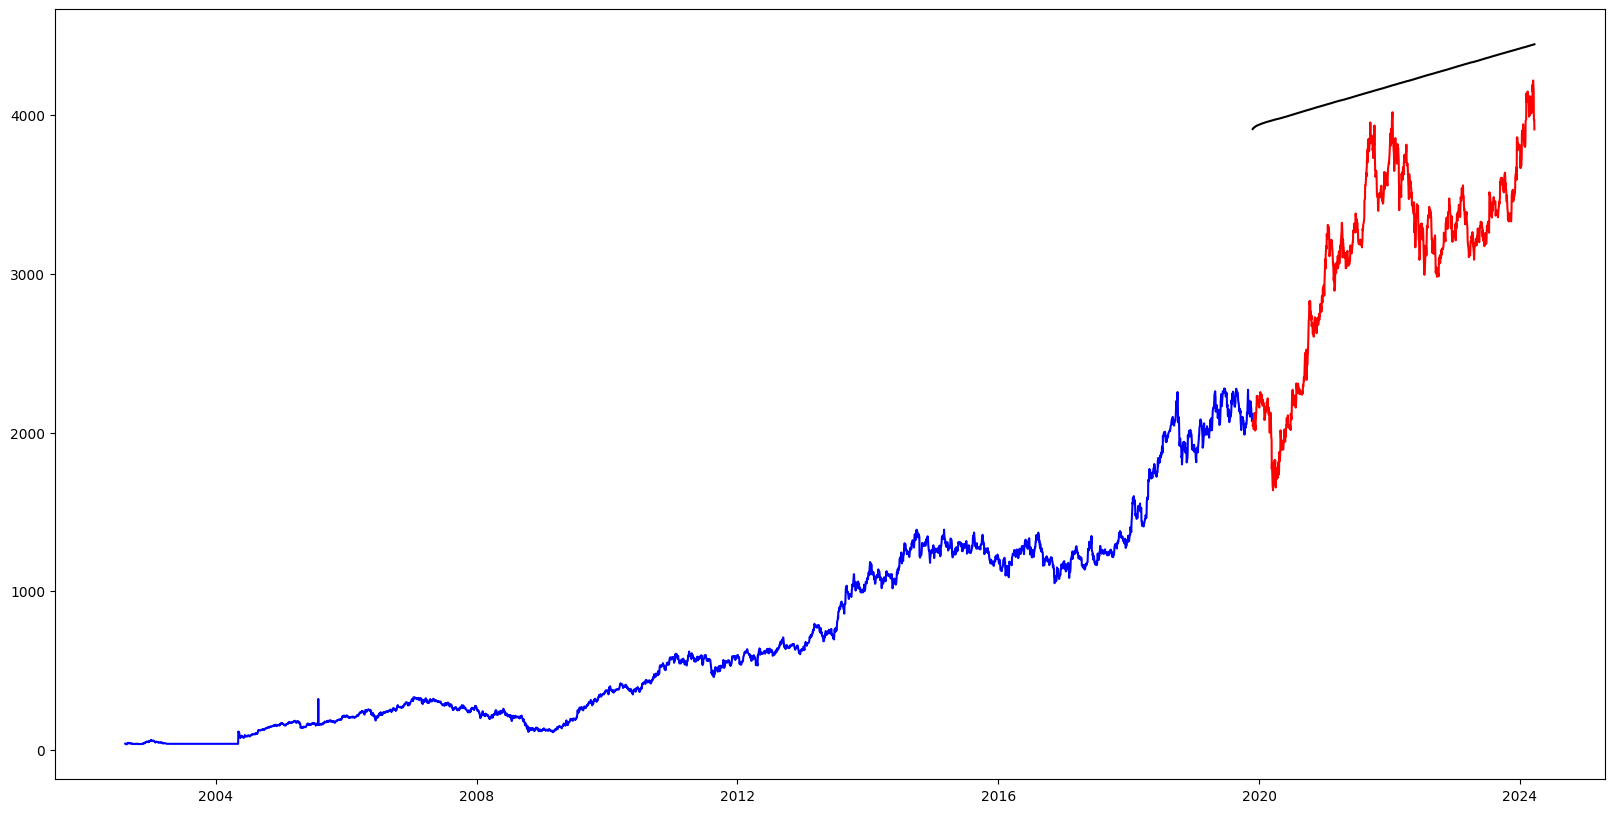

In [ ]:
plt.plot(df_close.iloc[:4294],color="blue")
plt.plot(df_close.iloc[4294:],color="red")
plt.plot(forecast_df,color="black")

## FbProphet

In [ ]:
close_data = df_close.reset_index()
close_data = close_data.rename(columns = {"Date":"ds","Close":"y"})
close_data.head()

,ds,y
0,2002-08-12,39.700001
1,2002-08-13,39.162498
2,2002-08-14,36.462502
3,2002-08-15,36.462502
4,2002-08-16,36.375000


In [ ]:
!pip install prophet
import prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjf_rah5m/v3wybhtd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjf_rah5m/cw5zu797.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38116', 'data', 'file=/tmp/tmpjf_rah5m/v3wybhtd.json', 'init=/tmp/tmpjf_rah5m/cw5zu797.json', 'output', 'file=/tmp/tmpjf_rah5m/prophet_modelptiow3ap/prophet_model-20240324110932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:09:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


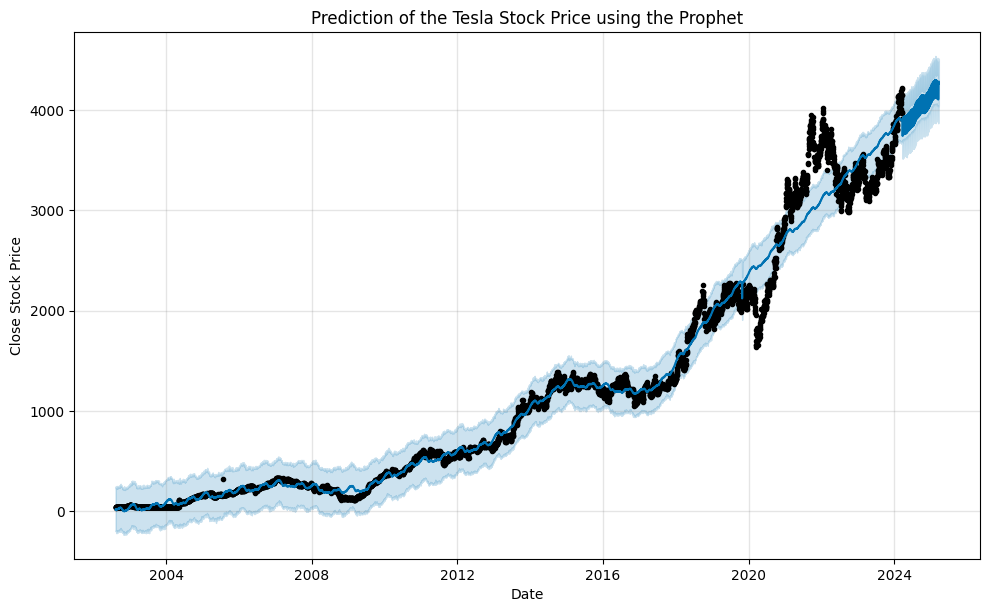

In [ ]:
from prophet import Prophet
m = Prophet(daily_seasonality = True)
m.fit(close_data)
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Tesla Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

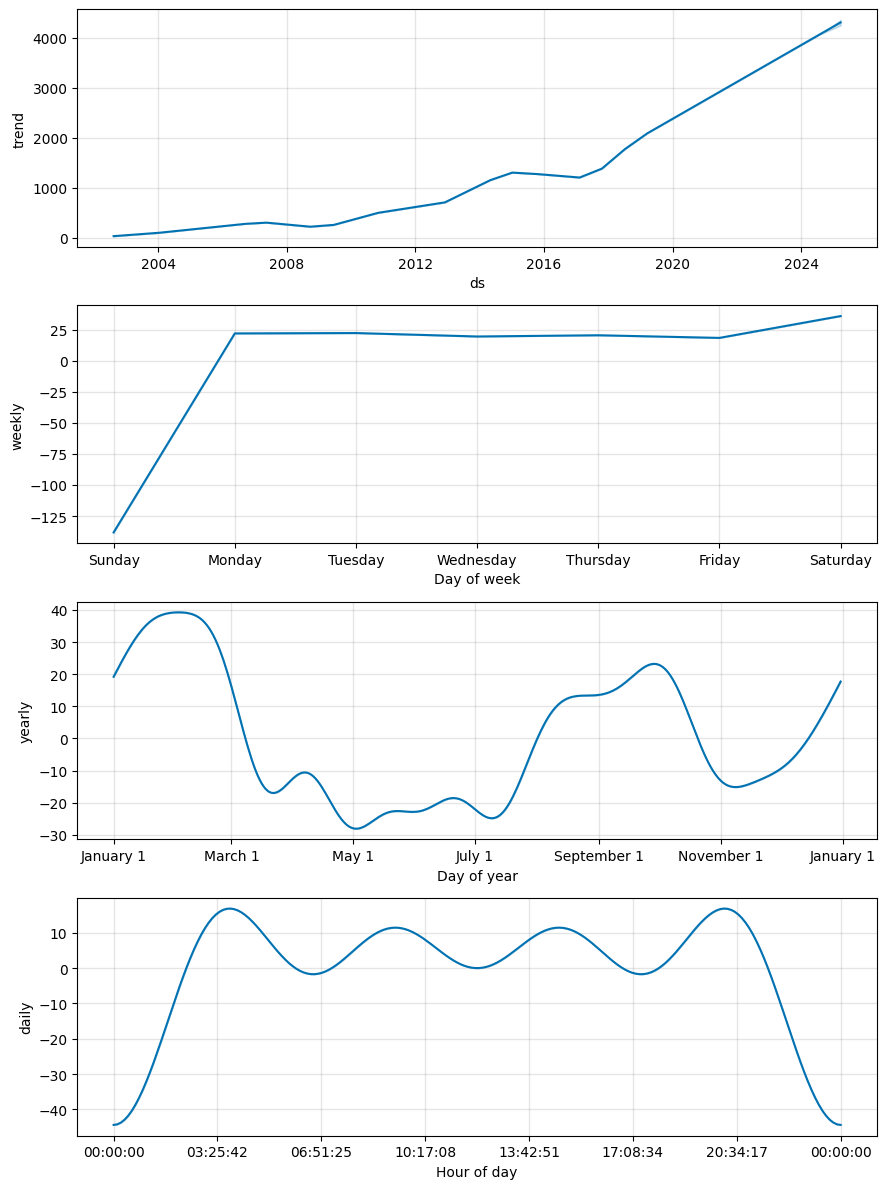

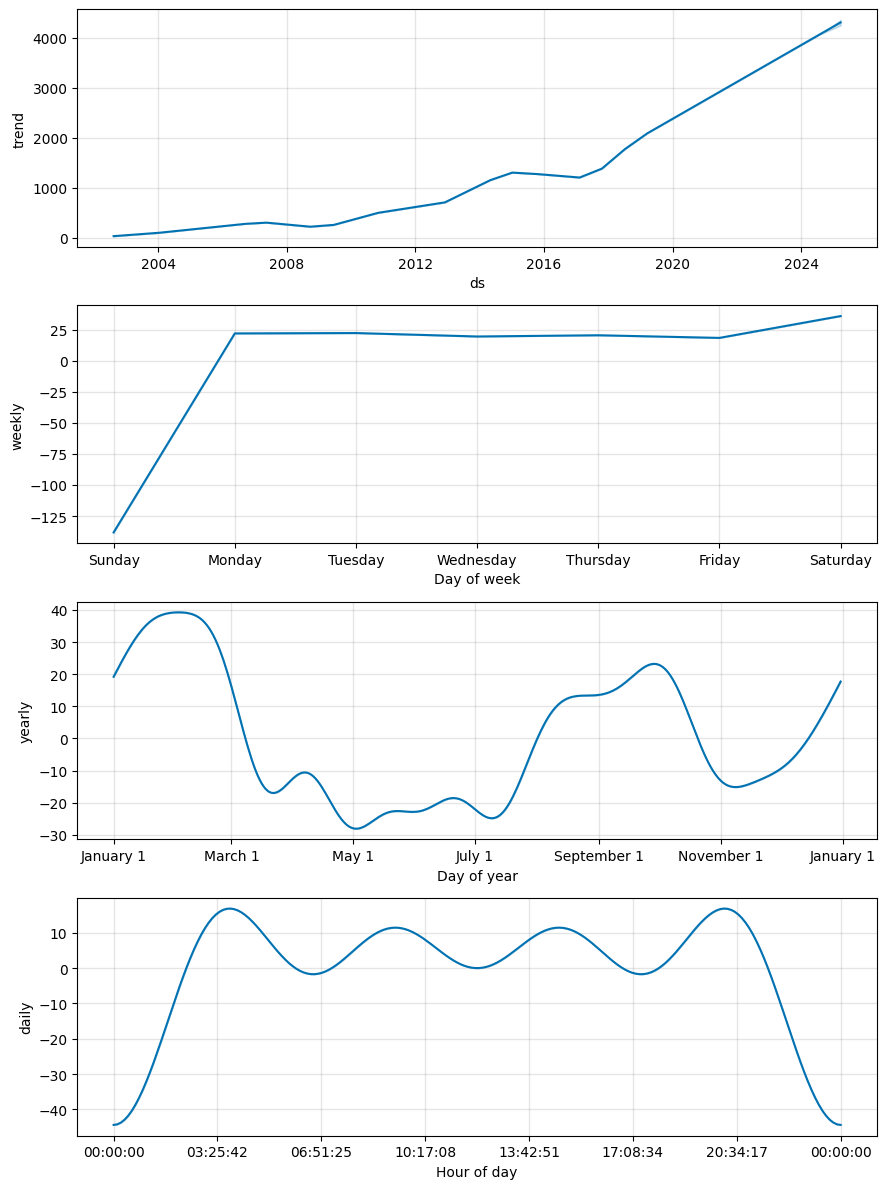

In [ ]:
m.plot_components(prediction)


# Model evaluation

In [ ]:
##Getting all RMSE values and Comparing them
rmse_data = pd.DataFrame({"Models":["CNN","RNN","LSTM","GRU","Bi-LSTM","Combined Model(LSTM+Bi-LSTM)"],"RootMeanSquareError":[cnn_rmse,rnn_rmse,lstm_rmse,gru_rmse,bi_lstm_rmse,combined_rmse]})
rmse_data

,Models,RootMeanSquareError
0,CNN,97.072359
1,RNN,125.587047
2,LSTM,154.111935
3,GRU,318.065169
4,Bi-LSTM,242.080959
5,Combined Model(LSTM+Bi-LSTM),186.660222


### Best Model Found to be: **Convolutional neural network(CNN) 1-D**

# Fine tuning

In [ ]:
#Hyperparameter tuning
from tensorflow.keras.optimizers import Adam
# Define the CNN model
i = Input(shape = (X_train.shape[1],1))
x = Conv1D(filters = 32,kernel_size = 3,activation = "relu")(i)
x = Flatten()(x)
x = Dense(1)(x)
cnn_model_up = Model(i,x)

# Compile the model
cnn_model_up.compile(optimizer=Adam(learning_rate = 0.01), loss='mean_squared_error')
cnn_model_up.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 50, 1)]           0         
                                                                 
 conv1d_8 (Conv1D)           (None, 48, 32)            128       
                                                                 
 flatten_8 (Flatten)         (None, 1536)              0         
                                                                 
 dense_22 (Dense)            (None, 1)                 1537      
                                                                 
Total params: 1665 (6.50 KB)
Trainable params: 1665 (6.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
r = cnn_model_up.fit(X_train,y_train,epochs = 100,validation_data = (X_test,y_test))

Epoch 1/100
116/116 [==============================] - 3s 13ms/step - loss: 0.0062 - val_loss: 0.0114
Epoch 2/100
116/116 [==============================] - 2s 13ms/step - loss: 6.2745e-04 - val_loss: 0.0117
Epoch 3/100
116/116 [==============================] - 1s 8ms/step - loss: 4.7154e-04 - val_loss: 0.0079
Epoch 4/100
116/116 [==============================] - 1s 7ms/step - loss: 4.6614e-04 - val_loss: 0.0054
Epoch 5/100
116/116 [==============================] - 1s 7ms/step - loss: 4.4156e-04 - val_loss: 0.0047
Epoch 6/100
116/116 [==============================] - 1s 7ms/step - loss: 5.3258e-04 - val_loss: 0.0054
Epoch 7/100
116/116 [==============================] - 1s 6ms/step - loss: 3.3470e-04 - val_loss: 0.0051
Epoch 8/100
116/116 [==============================] - 1s 8ms/step - loss: 4.3470e-04 - val_loss: 0.0036
Epoch 9/100
116/116 [==============================] - 2s 16ms/step - loss: 7.0580e-04 - val_loss: 0.0082
Epoch 10/100
116/116 [==============================] - 

In [ ]:
#Model prediction
train_predict=cnn_model_up.predict(X_train)
test_predict=cnn_model_up.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
cnn_updated_rmse = math.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1,1)),test_predict))
cnn_updated_rmse

49/49 [==============================] - 0s 2ms/step


64.44887594900364

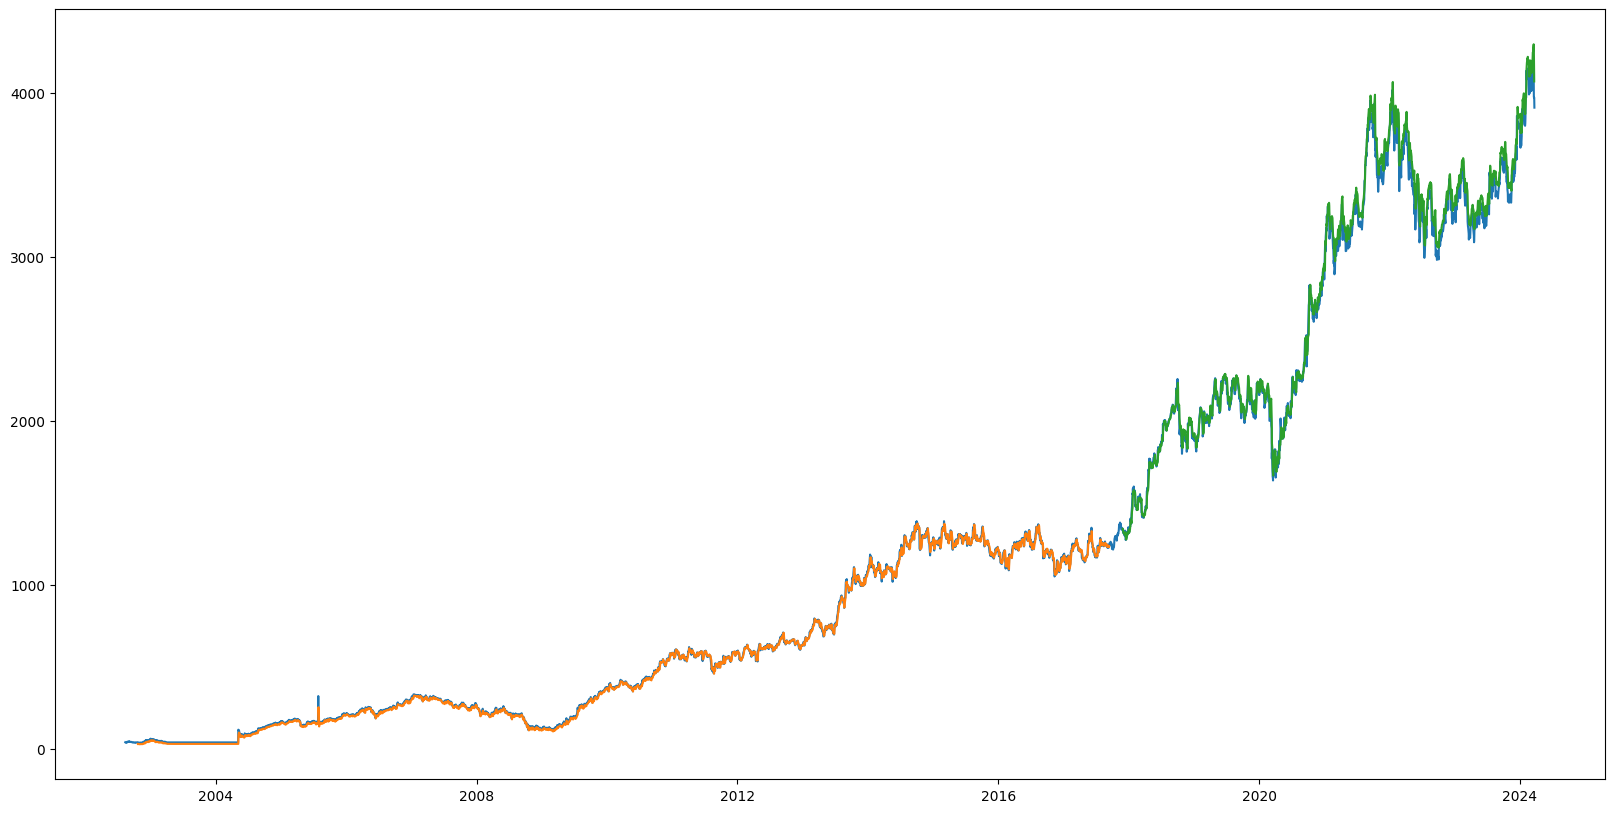

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=50
trainPredictPlot = np.empty_like(df).reshape(-1,1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df).reshape(-1,1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(df)
plt.plot(df.index,trainPredictPlot)
plt.plot(df.index,testPredictPlot)
plt.show()

### After experimenting with various activation functions and learning rates our cnn model performs better with
1. Learning Rate 0.01
2. Activation Function: Relu
3. Optimizer: Adam

# Forecasting for next 30 days using upgraded cnn model

In [ ]:
#Loading our model
cnn_load = tf.keras.models.load_model("/content/cnnModelForStockPrice.h5")

In [ ]:
len(test_data)

1611

In [ ]:
##Taking previous 50 days for future forecast
x_input = test_data[1561:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
# temp_input

In [ ]:
# demonstrate prediction for next 30 days
lst_output=[]
n_steps=50
i=0
while(i<365):

    if(len(temp_input)>50):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        # print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = cnn_load.predict(x_input, verbose=0)
        # print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = cnn_load.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


# print(lst_output)


In [ ]:
day_new=np.arange(1,51)
day_pred=np.arange(51,81)

In [ ]:
len(df)

5368

In [ ]:
5368-50

5318

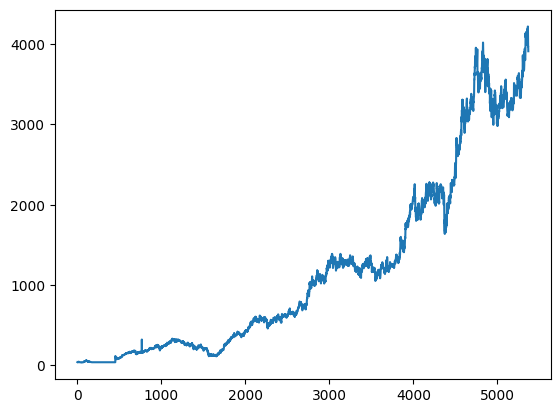

In [ ]:
df3=df.tolist()
plt.plot(df3)

In [ ]:
# print(scaler.inverse_transform(lst_output).reshape(-1,1))
lst_output = scaler.inverse_transform(lst_output)


In [ ]:
forecast_lst = [i[0] for i in lst_output]
df3.extend(forecast_lst)


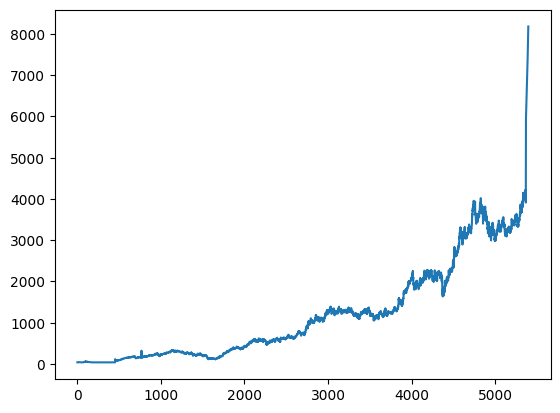

<Figure size 2000x800 with 0 Axes>

In [ ]:
plt.plot(df3)
plt.figure(figsize = (20,8));

# Saving the best model

In [ ]:
cnn_model_up.save("cnnModelForStockPrice.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **End**